### 가설 세우기
- K-beauty는 성장하고 있을까?
- 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

if os.name == "nt":
    sns.set(font="Malgun Gothic")
elif on.name == "posix":
    sns.set(font="AppleGothic")

In [3]:
%config InlineBackend.figure_format = 'retina'

### 데이터 불러오기

In [4]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200908204951.csv", encoding="cp949")
df_raw.shape

(450, 27)

In [5]:
df_raw["국가(대륙)별"].value_counts()

EU            45
중남미           45
대양주           45
중국            45
일본            45
중동            45
합계            45
아세안(ASEAN)    45
미국            45
기타            45
Name: 국가(대륙)별, dtype: int64

In [6]:
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1382
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,2033,1553,1784,1773,1298,1408,1653,1382
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1785
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1736
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


### 분석과 시각화를 위한 tidy data 만들기

In [7]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간",
           value_name="백만원")
df.shape

(10800, 5)

In [8]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
국가(대륙)별    10800 non-null object
상품군별       10800 non-null object
판매유형별      10800 non-null object
기간         10800 non-null object
백만원        10800 non-null object
dtypes: object(5)
memory usage: 422.0+ KB


### 데이터 전처리

#### 기간에서 연도를 분리하기

In [10]:
"2019 4/4 p)".split()[0]

'2019'

In [11]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [12]:
"2019 4/4 p)".split()[1].split("/")[0]

'4'

In [13]:
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


#### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [14]:
df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


#### 필요없는 데이터 제거하기

In [15]:
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
국가(대륙)별    9072 non-null object
상품군별       9072 non-null object
판매유형별      9072 non-null object
기간         9072 non-null object
백만원        6048 non-null float64
연도         9072 non-null int64
분기         9072 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [16]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

### K-Beauty 시각화

In [17]:
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


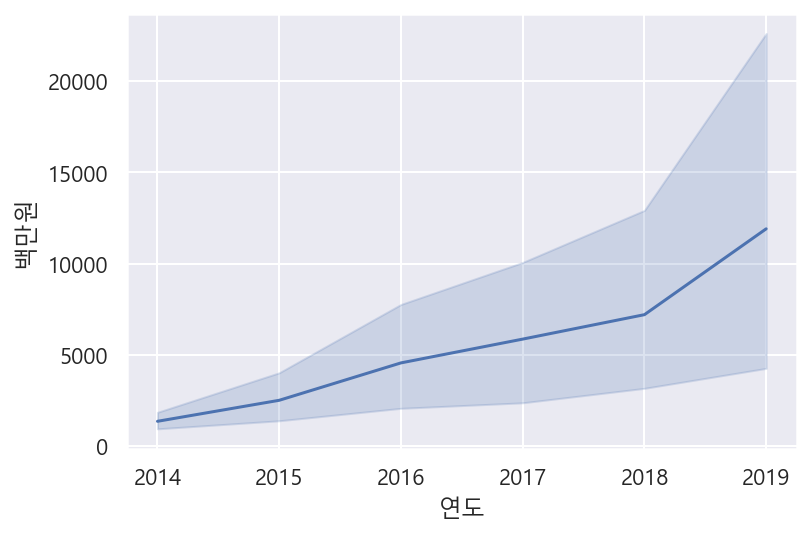

In [18]:
sns.lineplot(data = df_total, x="연도", y="백만원")

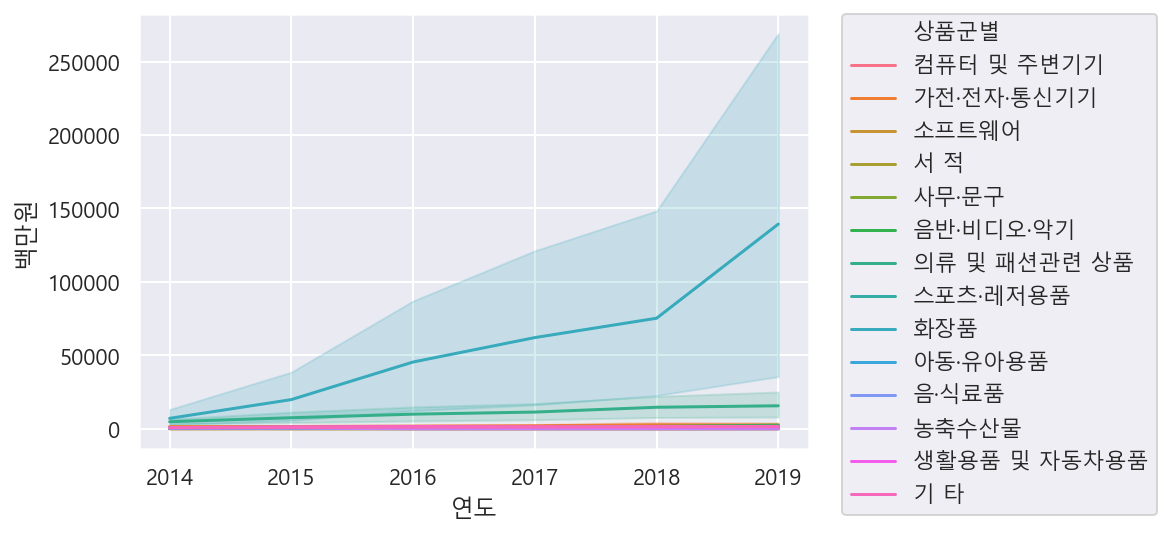

In [19]:
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
# 범례 표 밖으로 보이기

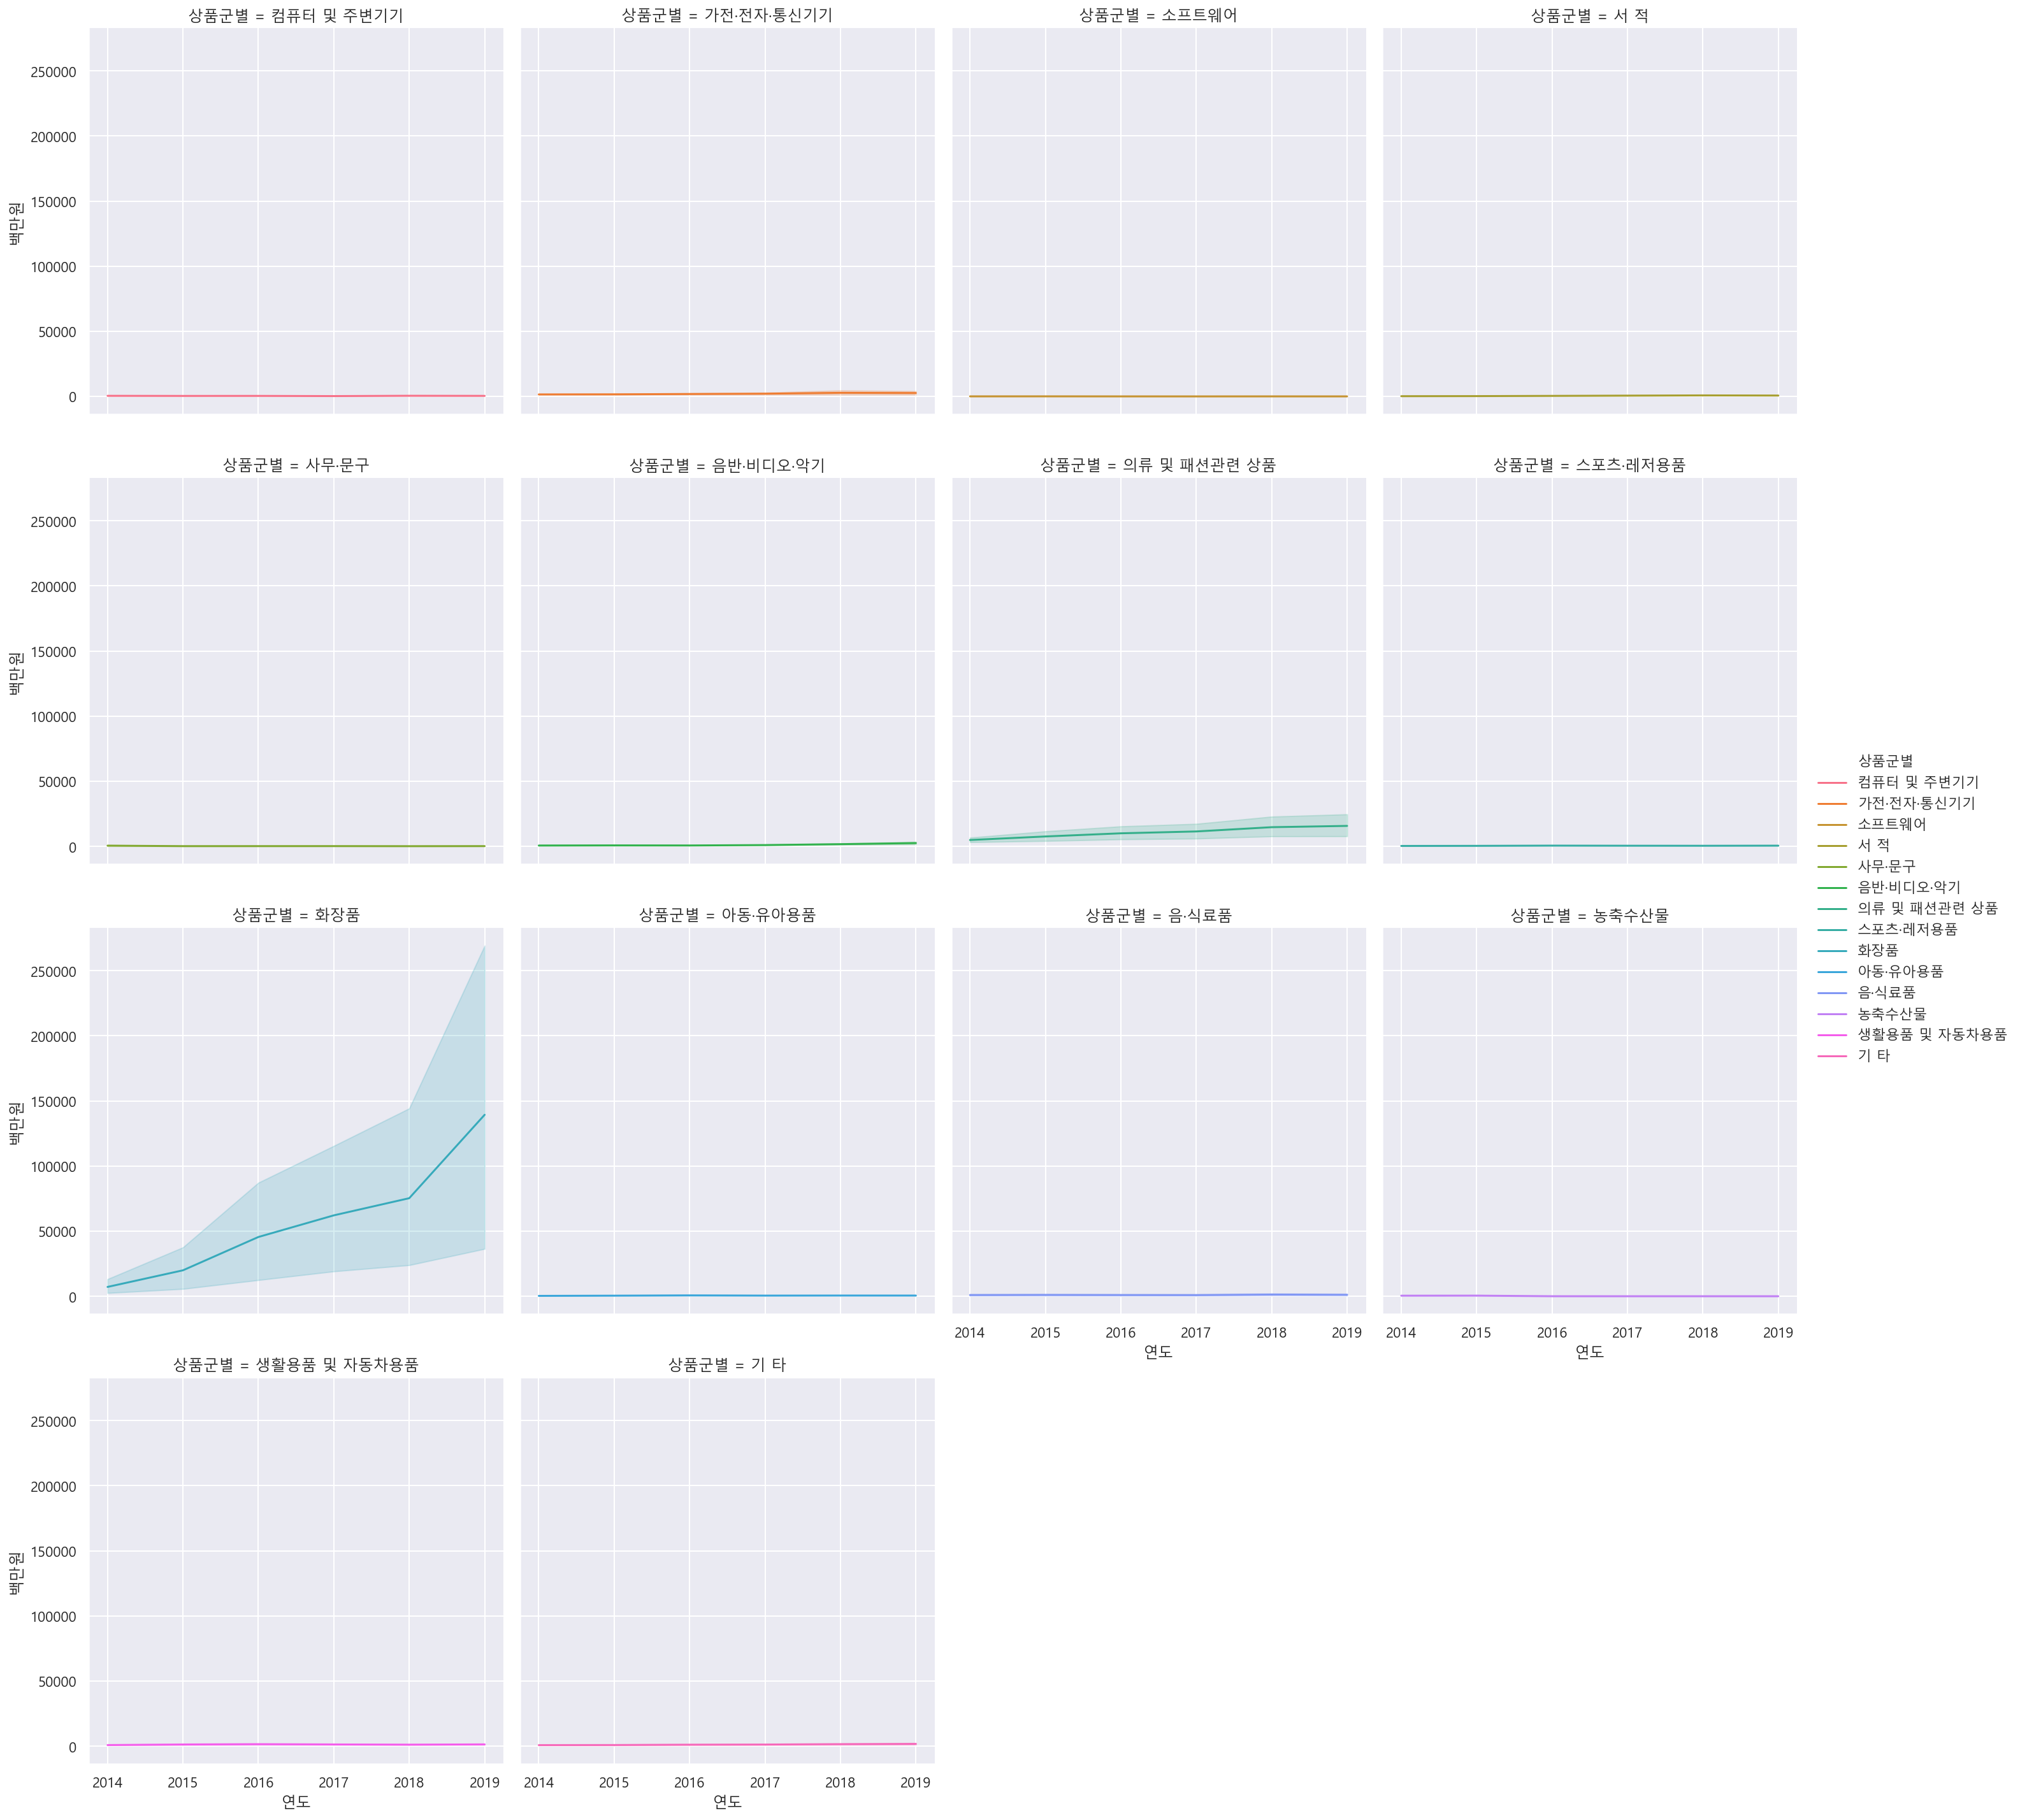

In [20]:
sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", 
            kind="line", col="상품군별", col_wrap=4)

In [21]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()

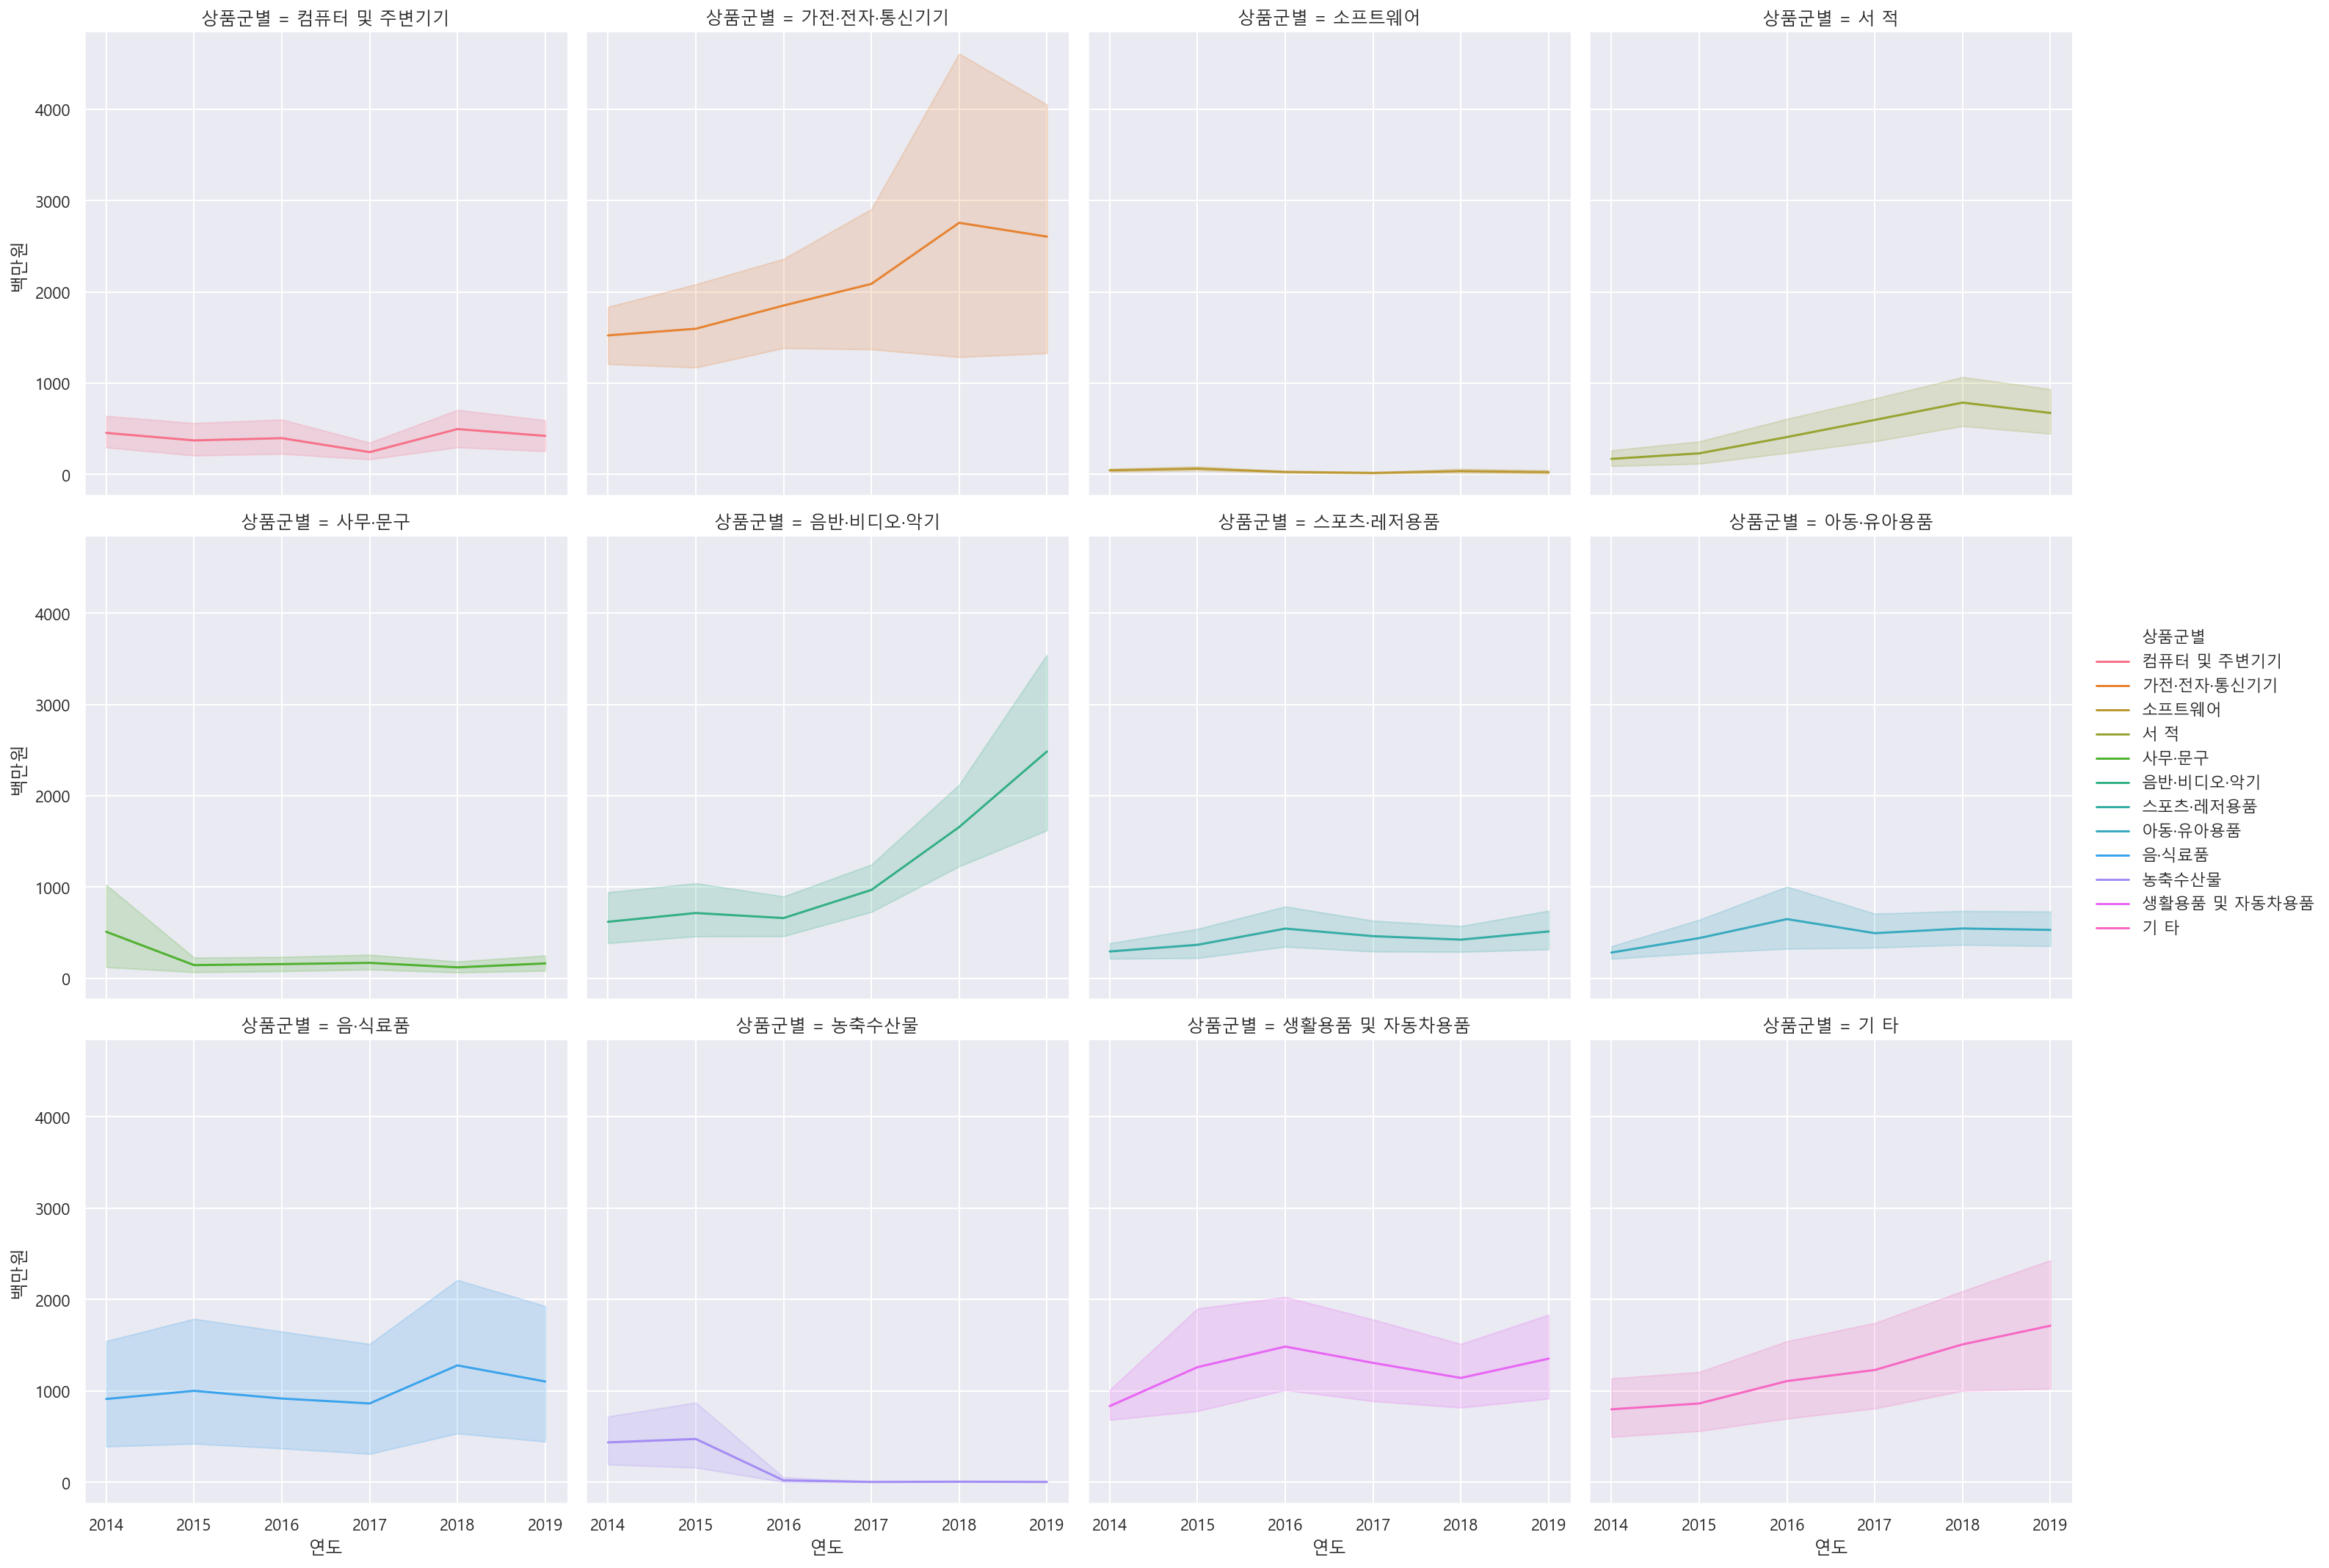

In [22]:
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", 
           col_wrap=4, kind='line')

#### 화장품의 온라인쇼핑 해외직접판매액

In [28]:
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

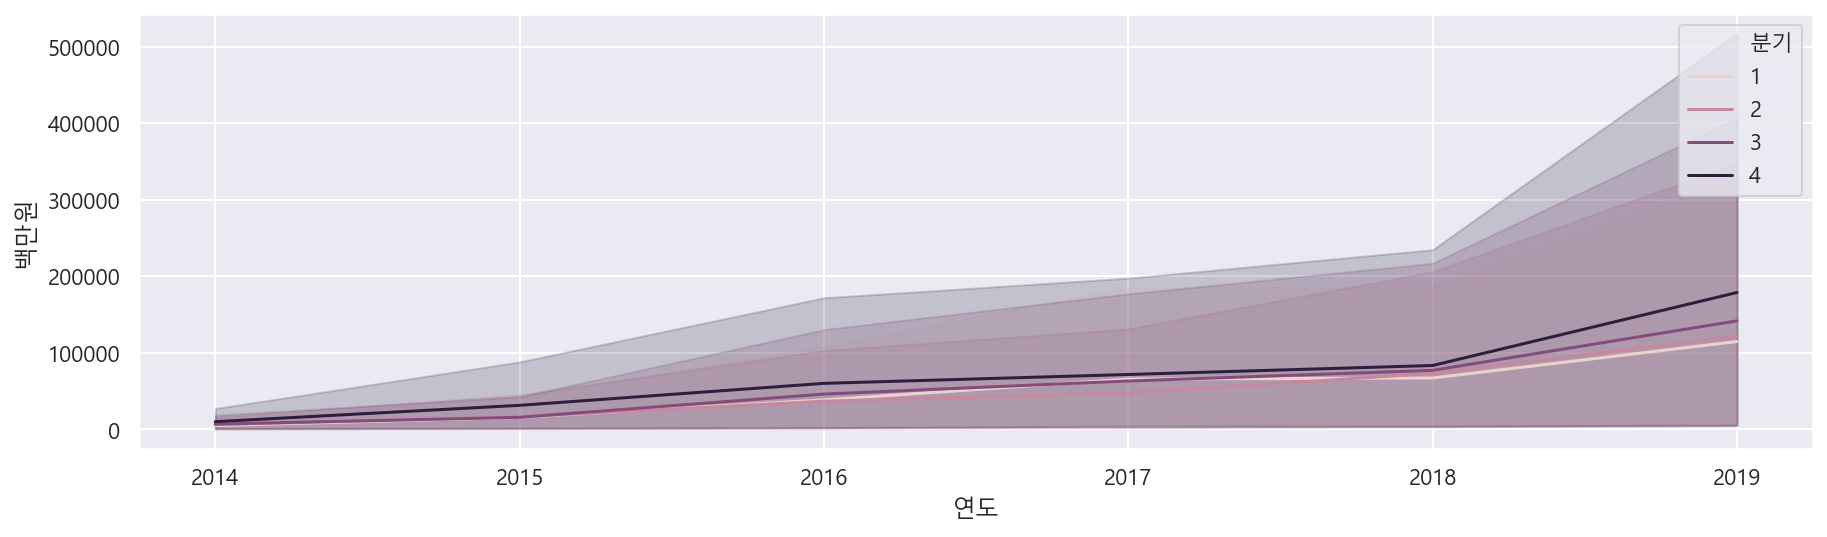

In [30]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

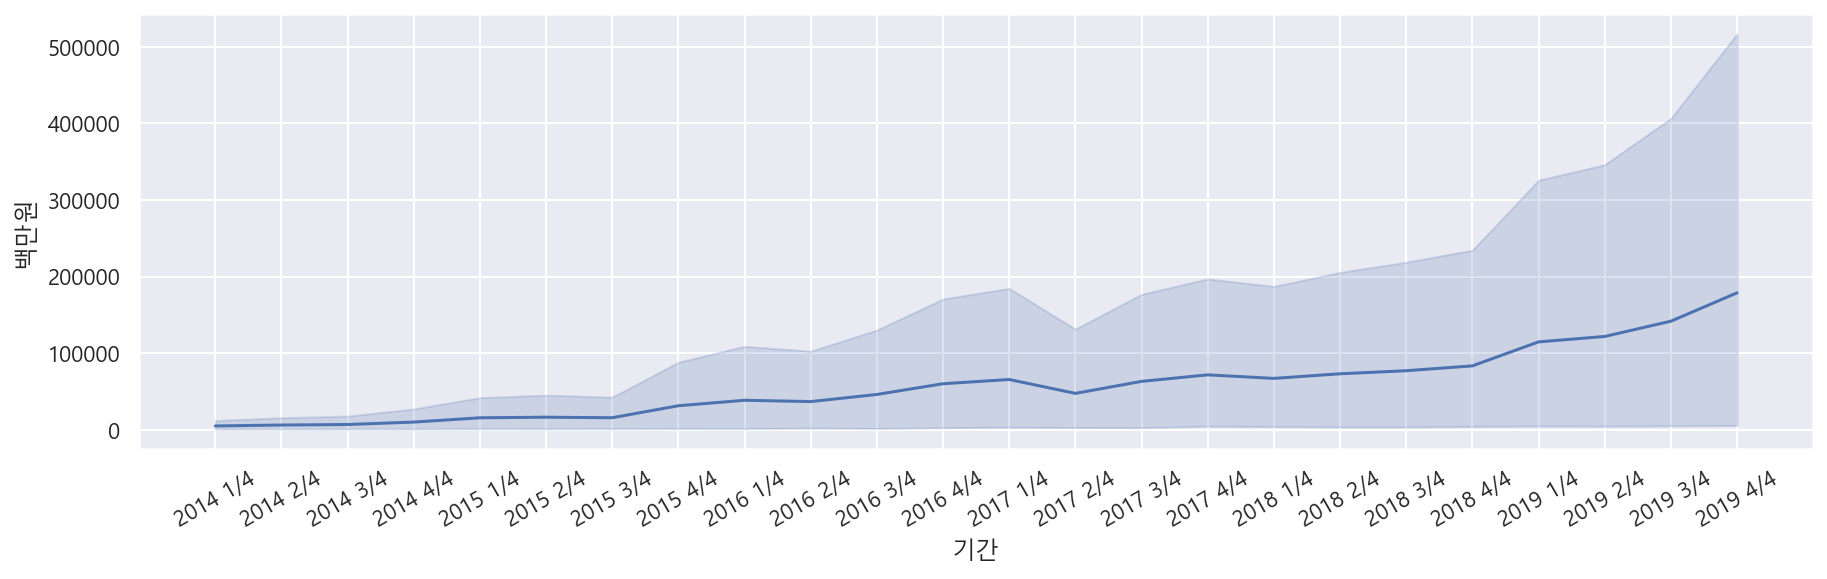

In [32]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

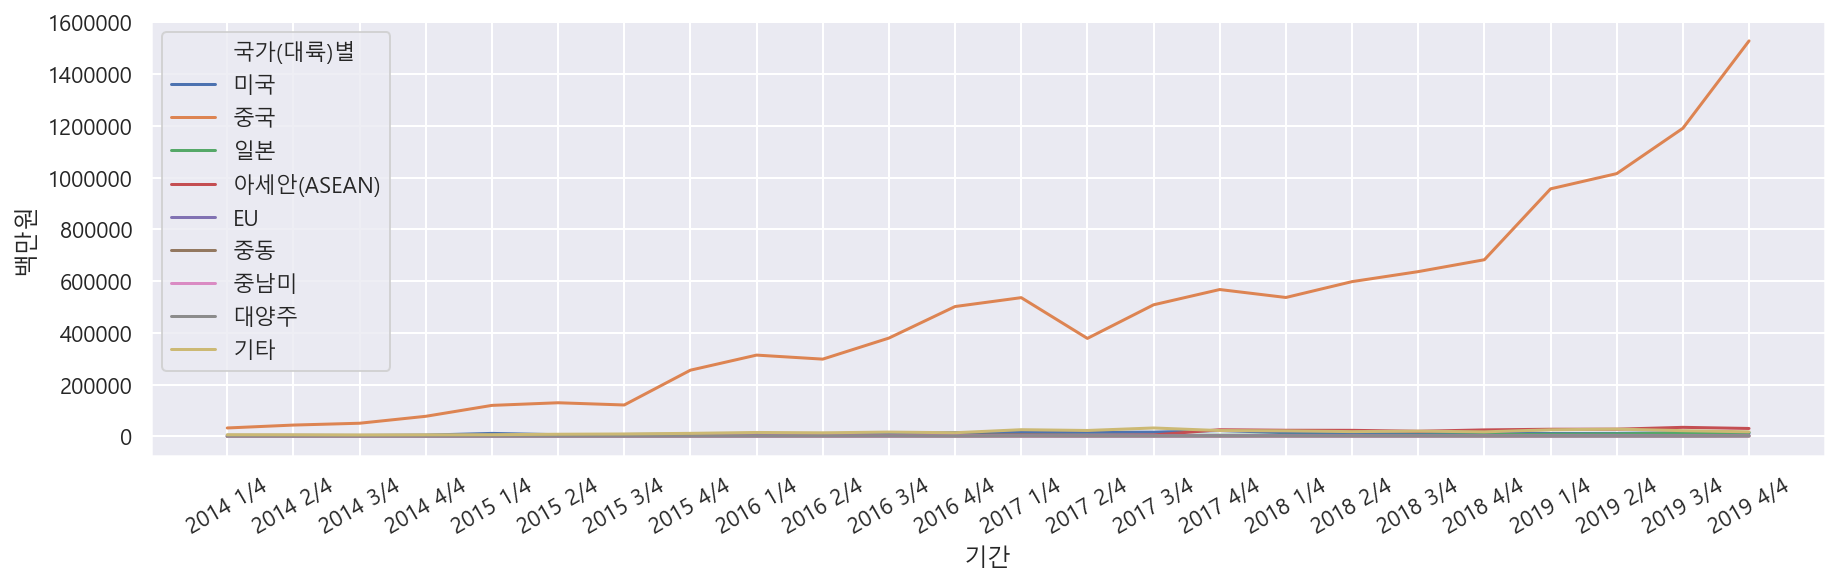

In [33]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

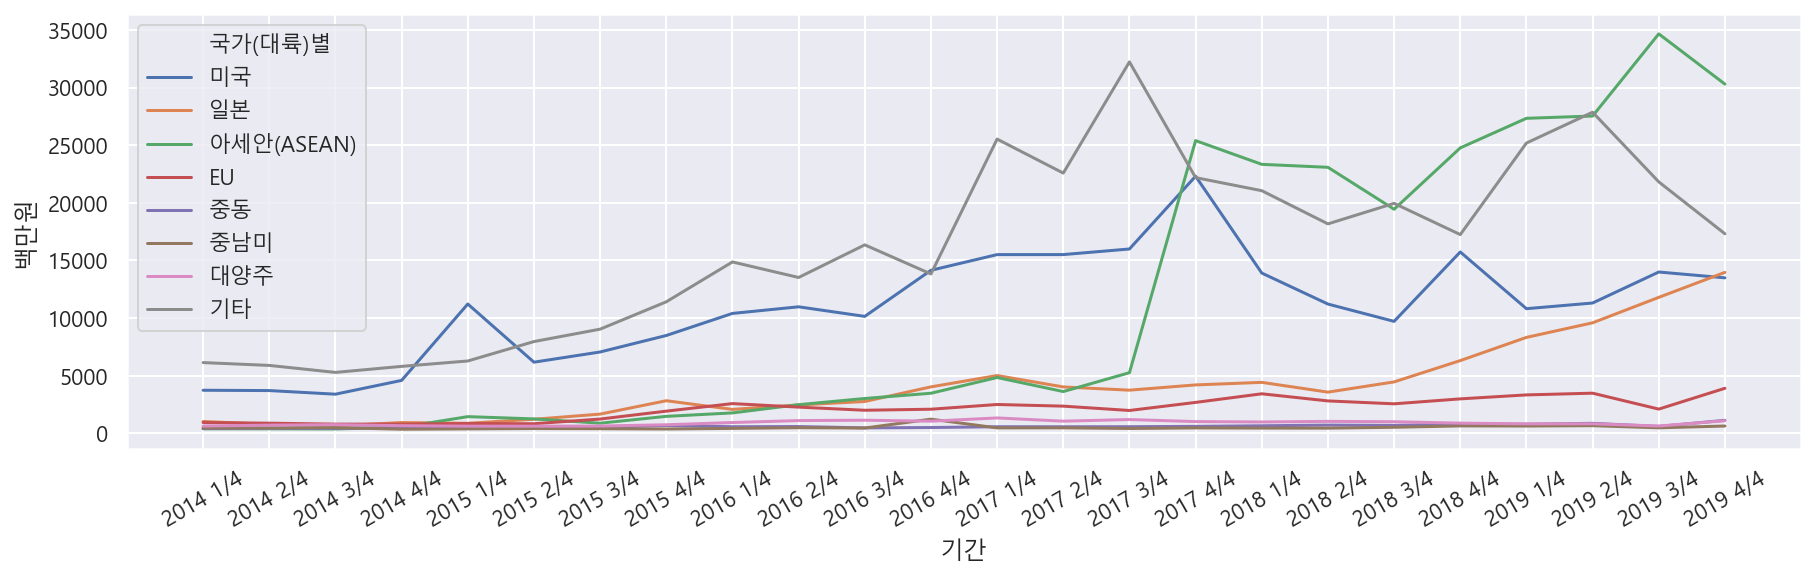

In [34]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] !="중국"], x="기간", y="백만원", hue="국가(대륙)별")

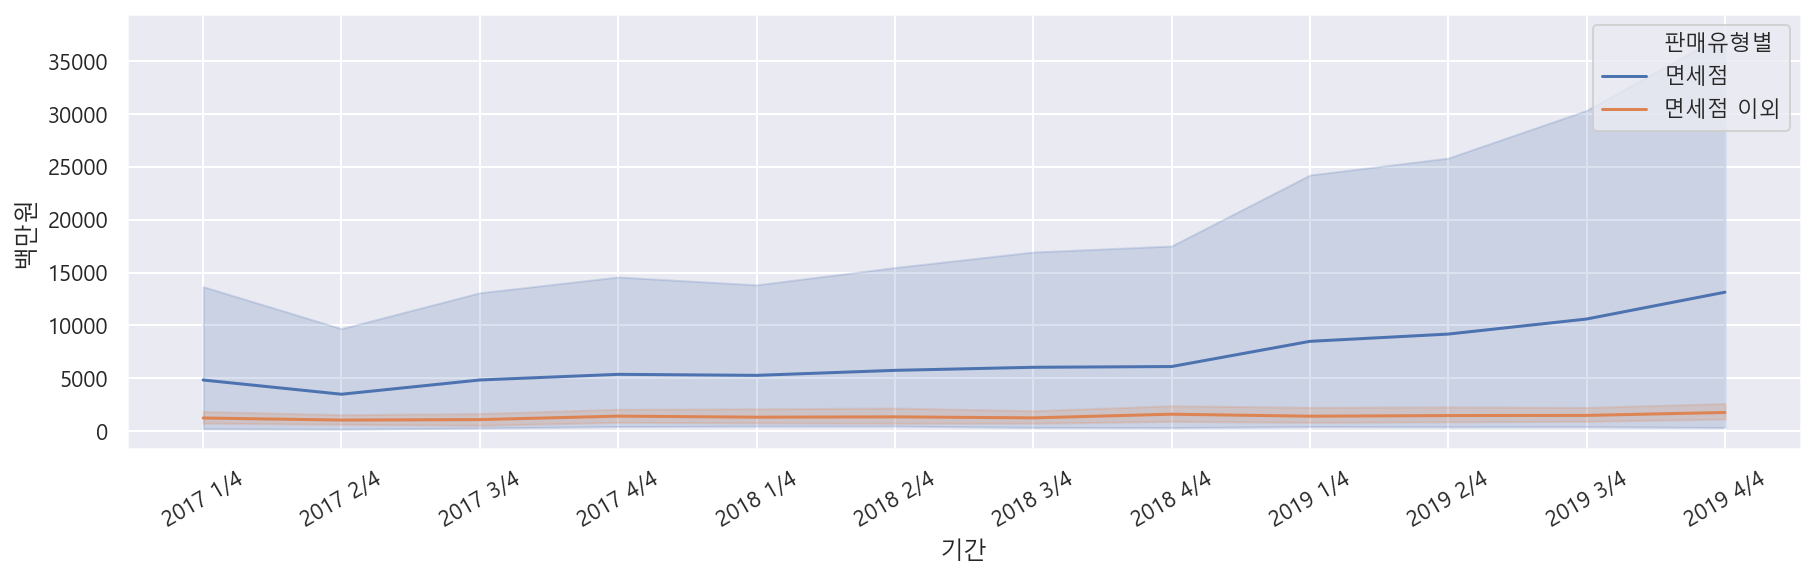

In [38]:
df_sub = df[df["판매유형별"] != "계"].copy()

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

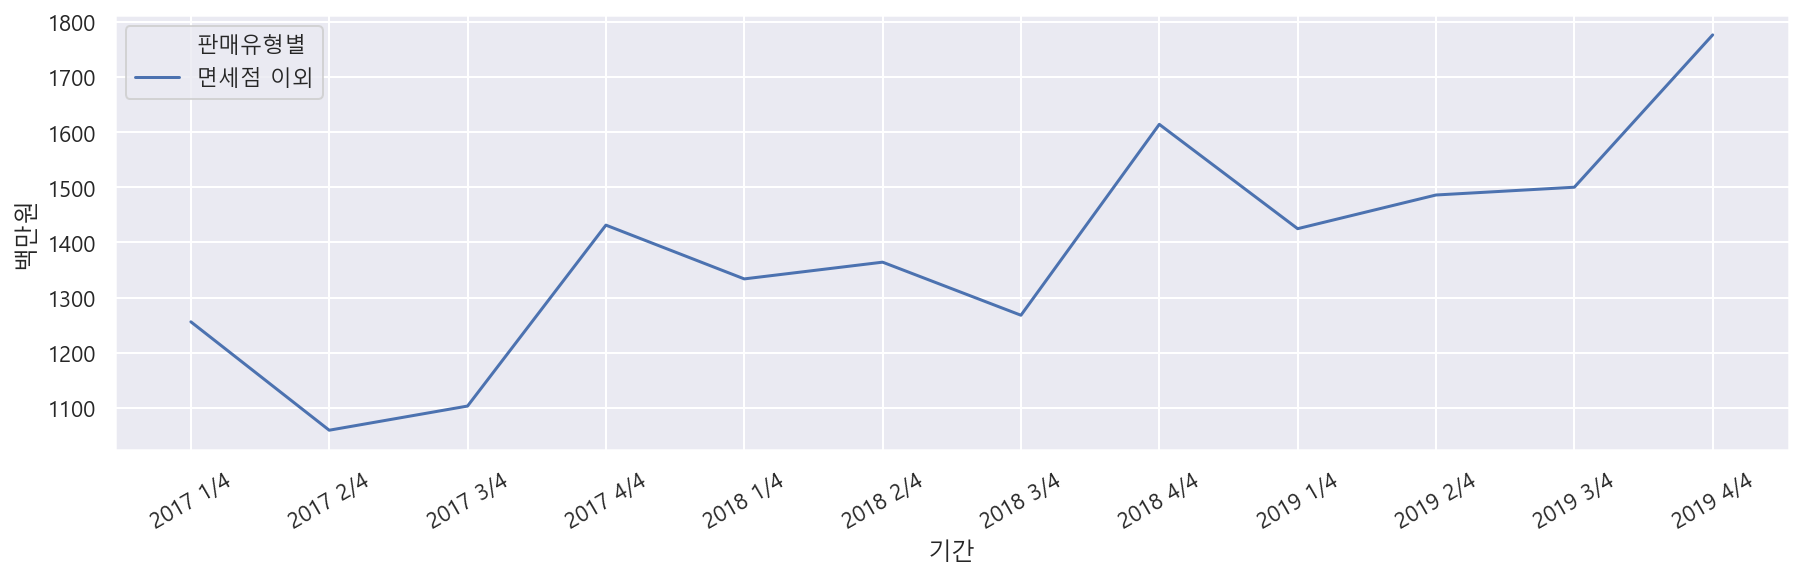

In [41]:
df_sub2 = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub2, x="기간", y="백만원", hue="판매유형별", ci=None)